# OpenSAFELY COVID Vaccine coverage report: Second doses 

OpenSAFELY is a new secure analytics platform for electronic patient records built on behalf of NHS England to deliver urgent academic and operational research during the pandemic. 

This is an extension of our [regular weekly report](https://reports.opensafely.org/reports/vaccine-coverage/) on COVID-19 vaccination coverage in England using data from 40% of general practices that use TPP electronic health record software. **The data requires careful interpretation and there are a number of caveats. Please read the full detail about our methods and discussion of our earlier results (as of 17 March 2021) in our paper available [here](https://doi.org/10.3399/BJGP.2021.0376).** 

The full analytical methods behind the latest results in this report are available [here](https://github.com/opensafely/nhs-covid-vaccination-uptake).

**Update: As of 17th January 2022, our vaccine reports will be published fortnightly.  If you rely on weekly data updates for your own reporting or analysis please contact team@opensafely.org to let us know.**

## Second doses

**Please note** This report is intended to highlight any differences between subgroups of priority cohorts in receiving second doses, only including those which are due (i.e. where at least 14 weeks has passed since the first dose). **It is therefore NOT a comprehensive view of all second doses given to date** - to see these figures please refer to the main report. 

In [1]:
from datetime import datetime
%matplotlib inline
%config InlineBackend.figure_format='png'

from IPython.display import display, Markdown
import os
import pandas as pd
pd.set_option("display.max_rows", 200)
import sys
sys.path.append('../lib/')
from create_report import find_and_sort_filenames
from second_third_doses import *

backend = os.getenv("OPENSAFELY_BACKEND", "expectations")
suffix = "_tpp"

display(Markdown(f"### Report last updated **{datetime.today().strftime('%d %b %Y')}**"))

with open(os.path.join("..", "interim-outputs","text", "latest_date.txt"), 'r') as file:
    latest_date_fmt = file.read()
    display(Markdown(f"### Second dose vaccinations included up to **{latest_date_fmt}** inclusive"))
    
with open(os.path.join("..", "interim-outputs","text", "latest_date_of_first_dose_for_due_second_doses.txt"), 'r') as file:
    latest_date_14w_fmt = file.read()
    
display(Markdown(
    f"### Only persons who had their first dose between the start of the campaign (**7 Dec 2020**) \
    and 14 weeks ago (**{latest_date_14w_fmt}**) are included in the 'due' group."))

### Report last updated **17 Jan 2022**

### Second dose vaccinations included up to **17 Jan 2022** inclusive

### Only persons who had their first dose between the start of the campaign (**7 Dec 2020**)     and 14 weeks ago (**11 Oct 2021**) are included in the 'due' group.

##  
## Contents

**Cumulative second dose vaccination figures among:**
- [**80+** population](#Cumulative-second-dose-vaccination-figures-among-80+-population)
- [**70-79** population](#Cumulative-second-dose-vaccination-figures-among-70-79-population)
- [**Care home** population](#Cumulative-second-dose-vaccination-figures-among-care-home-population)
- <a href="#Cumulative-second-dose-vaccination-figures-among-shielding-(aged-16-69)-population"><strong>Shielding (aged 16-69)</strong> population</a>
- [**65-69** population](#Cumulative-second-dose-vaccination-figures-among-65-69-population)
- <a href="#Cumulative-second-dose-vaccination-figures-among-Learning-Disabilities-(aged-16-64)-population"><strong>LD (aged 16-64)</strong> population</a>
- [**60-64** population](#Cumulative-second-dose-vaccination-figures-among-60-64-population)
- [**55-59** population](#Cumulative-second-dose-vaccination-figures-among-55-59-population)
- [**50-54** population](#Cumulative-second-dose-vaccination-figures-among-50-54-population)
- [**40-49** population](#Cumulative-second-dose-vaccination-figures-among-40-49-population)
- [**30-39** population](#Cumulative-second-dose-vaccination-figures-among-30-39-population)
- [**18-29** population](#Cumulative-second-dose-vaccination-figures-among-18-29-population)

[**SUMMARY**](#Summary)


In [2]:
with open('../lib/group_definitions.txt') as f:
    group_defs = f.read()
    display(Markdown(group_defs))

### Group definitions
- As of 29 Nov 2021, patient age is calculated at 31 Aug 2021 (previously 31 March 2021), in line with [national reporting](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1036047/Vaccine_surveillance_report_-_week_47.pdf). 
- The **care home** group is defined based on patients (aged 65+) having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/longres/v1/).
- The **shielding** group is defined based on patients (aged 16-69) having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/shield/v1/) provided it was not superceded by one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/nonshield/v1/).            
- The **LD** (learning disability) group is defined based on patients (aged 16-64) having one of [these](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/learndis/v1/) codes and excludes people who are shielding.
- Patients are counted in their highest risk category only; e.g. a 65-year-old who is shielding is only counted in the shielding group, not in the 65-69 group.
- The **housebound** group is defined based on [this](https://codelists.opensafely.org/codelist/opensafely/housebound/5bc77310/)
codelist and excludes people who were later recorded as [not housebound](https://codelists.opensafely.org/codelist/opensafely/no-longer-housebound/29a88ca6/) or in a [care home](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/longres/v1/).


/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative second dose vaccination figures among 80+ population 
 Please refer to footnotes below table for information.

Second Doses due at 17 Jan 2022 (n)  \
Category                                  Group                                                                     
overall                                   overall                                                           2,779   
Sex                                       F                                                                 1,463   
                                          M                                                                 1,316   
Age band                                  0                                                                    35   
                                          0-15                                                                175   
                                          16-17                                                               154   
                                          18-29                                                               217   
                                          30-34                                                               175   
                                          35-39                                                               175   
                                          40-44                                                               189   
                                          45-49                                                               161   
                                          50-54                                                               168   
                                          55-59                                                               224   
                                          60-64                                                               182   
                                          65-69                                                               161   
                                          70-74                                                               175   
                                          75-79                                                               175   
                                          80-84                                                               189   
                                          85-89                                                               182   
                                          90+                                                                  35   
Ethnicity (broad categories)              Black                                                               483   
                                          Mixed                                                               483   
                                          Other                                                               476   
                                          South Asian                                                         448   
                                          Unknown                                                             441   
                                          White                                                               455   
ethnicity 16 groups                        African                                                            140   
                                           Bangladeshi or British Bangladeshi                                 154   
                                           Caribbean                                                          140   
                                           Chinese                                                            161   
                                           Other                                                              147   
                                           Other Asian                                                        175   
                                          British or Mixed British                                  

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Only persons who are currently registered and had their first dose at least 14 weeks ago are included in the 'due' group.

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

- Chronic kidney disease is defined as the presence of a relevant diagnostic code, or a most recent stage recorded >= 3.

## 
 ## Second Doses Overdue Among 80+ Population

Second doses which have not been given at least 14 weeks since the first dose

Error bars indicate possible error caused by rounding

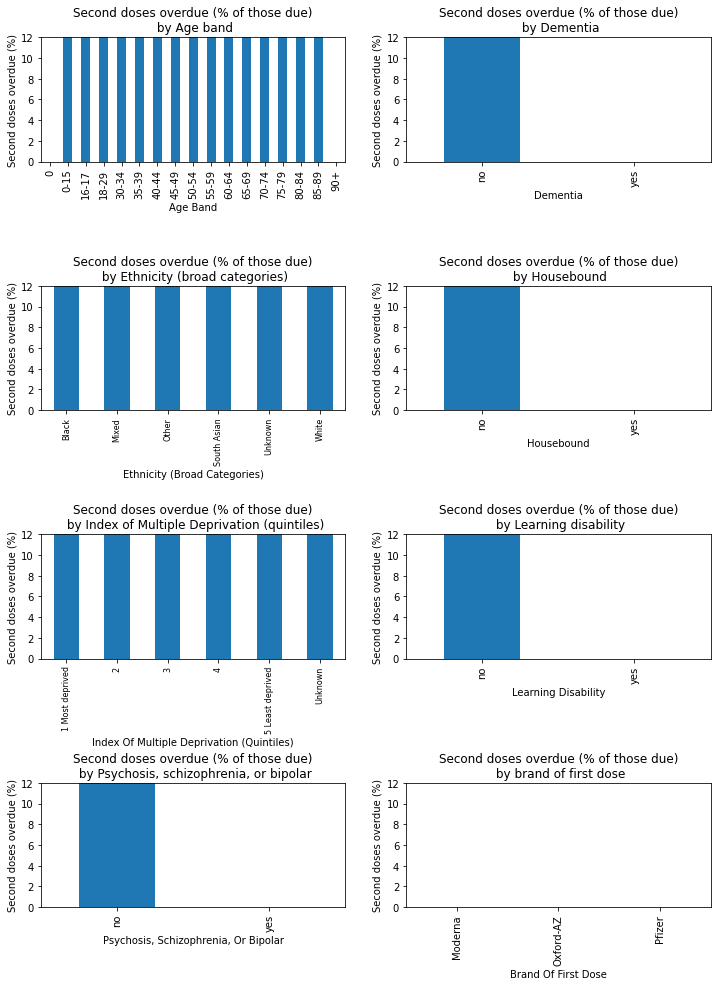

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative second dose vaccination figures among 70-79 population 
 Please refer to footnotes below table for information.

Second Doses due at 17 Jan 2022 (n)  \
Category                                  Group                                                                     
overall                                   overall                                                           4,739   
Sex                                       F                                                                 2,436   
                                          M                                                                 2,310   
Age band                                  0                                                                    56   
                                          0-15                                                                308   
                                          16-17                                                               301   
                                          18-29                                                               294   
                                          30-34                                                               280   
                                          35-39                                                               322   
                                          40-44                                                               336   
                                          45-49                                                               308   
                                          50-54                                                               315   
                                          55-59                                                               273   
                                          60-64                                                               315   
                                          65-69                                                               294   
                                          70-74                                                               336   
                                          75-79                                                               329   
                                          80-84                                                               301   
                                          85-89                                                               308   
                                          90+                                                                  56   
Ethnicity (broad categories)              Black                                                               805   
                                          Mixed                                                               812   
                                          Other                                                               777   
                                          South Asian                                                         854   
                                          Unknown                                                             693   
                                          White                                                               798   
ethnicity 16 groups                        African                                                            238   
                                           Bangladeshi or British Bangladeshi                                 259   
                                           Caribbean                                                          231   
                                           Chinese                                                            252   
                                           Other                                                              245   
                                           Other Asian                                                        259   
                                          British or Mixed British                                  

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Only persons who are currently registered and had their first dose at least 14 weeks ago are included in the 'due' group.

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

- Chronic kidney disease is defined as the presence of a relevant diagnostic code, or a most recent stage recorded >= 3.

## 
 ## Second Doses Overdue Among 70-79 Population

Second doses which have not been given at least 14 weeks since the first dose

Error bars indicate possible error caused by rounding

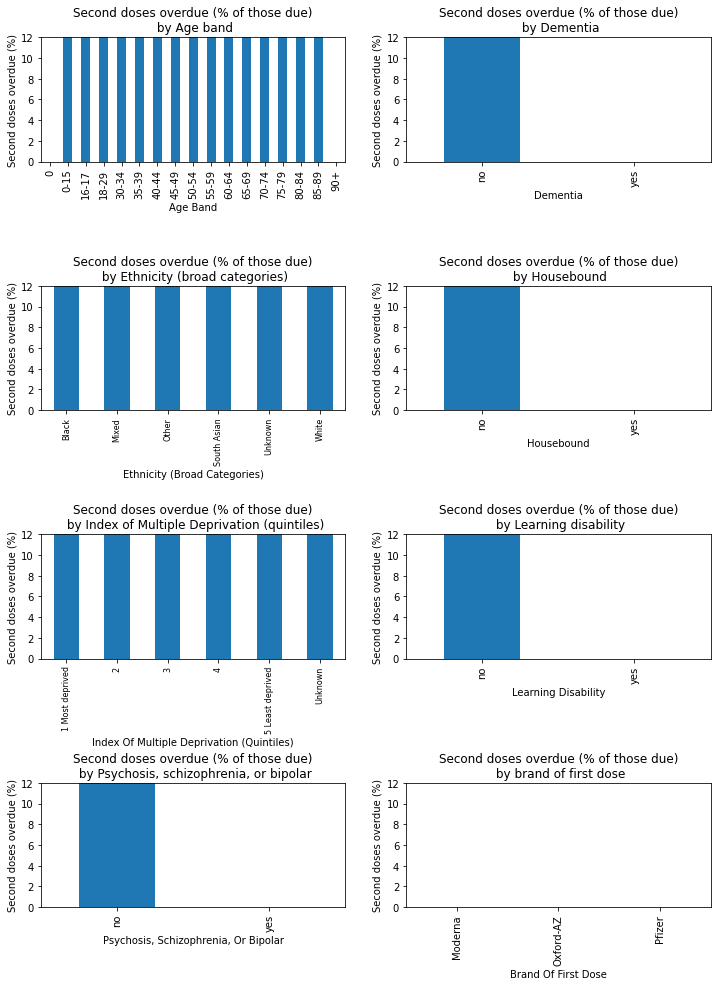

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative second dose vaccination figures among care home population 
 Please refer to footnotes below table for information.

Second Doses due at 17 Jan 2022 (n)  \
Category                     Group                                             
overall                      overall                                   1,876   
Sex                          F                                           938   
                             M                                           938   
Age band                     0                                            21   
                             0-15                                        126   
                             16-17                                       112   
                             18-29                                       140   
                             30-34                                       105   
                             35-39                                       133   
                             40-44                                       126   
                             45-49                                       126   
                             50-54                                       126   
                             55-59                                       112   
                             60-64                                       112   
                             65-69                                       126   
                             70-74                                       133   
                             75-79                                       126   
                             80-84                                       119   
                             85-89                                       112   
                             90+                                          21   
Ethnicity (broad categories) Black                                       322   
                             Mixed                                       322   
                             Other                                       343   
                             South Asian                                 322   
                             Unknown                                     280   
                             White                                       287   
Dementia                     no                                        1,855   
                             yes                                          21   
brand of first dose          Pfizer                                        7   
                             Unknown                                   1,862   

                                         Second doses overdue (n)  \
Category                     Group                                  
overall                      overall                          371   
Sex                          F                                196   
                             M                                175   
Age band                     0                                  7   
                             0-15                              21   
                             16-17                             14   
                             18-29                             28   
                             30-34                             21   
                             35-39                             28   
                             40-44                             28   
                             45-49                             21   
                             50-54                             28   
                             55-59                             28   
                             60-64                             21   
                             65-69                             28   
                             70-74                             28   
                             75-79                             28   
                             80-84                             28   
                             85-89                             14   
                             90

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Only persons who are currently registered and had their first dose at least 14 weeks ago are included in the 'due' group.

- Population includes those known to live in an elderly care home, based upon clinical coding.

## 
 ## Second Doses Overdue Among Care Home Population

Second doses which have not been given at least 14 weeks since the first dose

Error bars indicate possible error caused by rounding

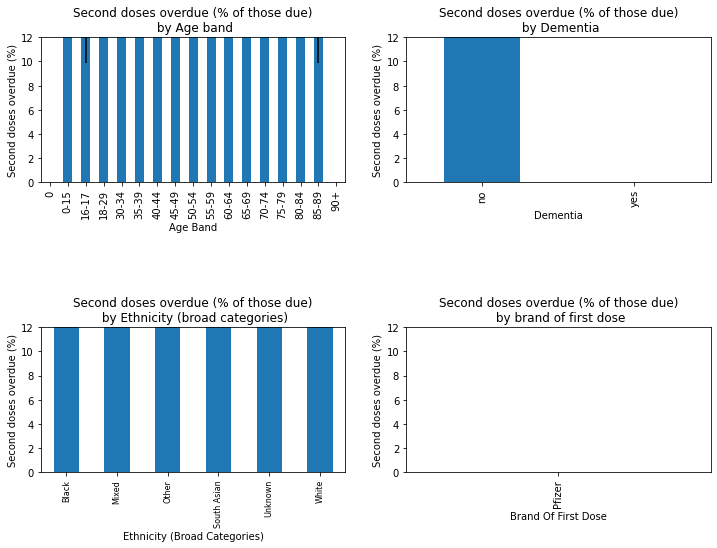

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative second dose vaccination figures among shielding (aged 16-69) population 
 Please refer to footnotes below table for information.

Second Doses due at 17 Jan 2022 (n)  \
Category                                  Group                                                  
overall                                   overall                                          588   
newly shielded since feb 15               no                                               581   
                                          yes                                                7   
Sex                                       F                                                301   
                                          M                                                294   
Age band                                  16-29                                             77   
                                          30-39                                             70   
                                          40-49                                             84   
                                          50-59                                             56   
                                          60-69                                             84   
                                          70-79                                            147   
                                          80+                                               77   
Ethnicity (broad categories)              Black                                            105   
                                          Mixed                                             98   
                                          Other                                            105   
                                          South Asian                                      112   
                                          Unknown                                           77   
                                          White                                             98   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                  112   
                                          2                                                105   
                                          3                                                105   
                                          4                                                 98   
                                          5 Least deprived                                 140   
                                          Unknown                                           28   
Learning disability                       no                                               581   
                                          yes                                                7   
Chronic kidney disease                    no                                               455   
                                          yes                                              133   
brand of first dose                       Pfizer                                             0   
                                          Unknown                                          588   

                                                           Second doses overdue (n)  \
Category                                  Group                                       
overall                                   overall                               119   
newly shielded since feb 15               no                                    112   
                                          yes                                     7   
Sex                                       F                                      63   
                                          M                                      63   
Age band                                  16-29                                  14   
                                          30-39                                  14   
                                          40-49                                  14   
                                          50-59     

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Only persons who are currently registered and had their first dose at least 14 weeks ago are included in the 'due' group.

- Population excludes those over 65 known to live in an elderly care home, based upon clinical coding.

- Chronic kidney disease is defined as the presence of a relevant diagnostic code, or a most recent stage recorded >= 3.

## 
 ## Second Doses Overdue Among Shielding (Aged 16-69) Population

Second doses which have not been given at least 14 weeks since the first dose

Error bars indicate possible error caused by rounding

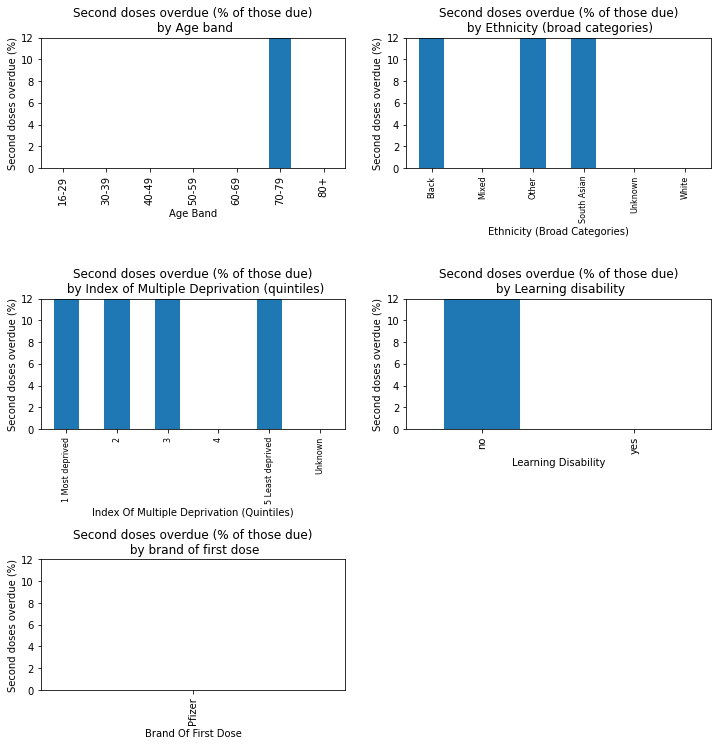

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative second dose vaccination figures among 65-69 population 
 Please refer to footnotes below table for information.

Second Doses due at 17 Jan 2022 (n)  \
Category                                  Group                                                                     
overall                                   overall                                                           2,926   
Sex                                       F                                                                 1,456   
                                          M                                                                 1,470   
Ethnicity (broad categories)              Black                                                               518   
                                          Mixed                                                               490   
                                          Other                                                               497   
                                          South Asian                                                         490   
                                          Unknown                                                             420   
                                          White                                                               504   
ethnicity 16 groups                        African                                                            154   
                                           Bangladeshi or British Bangladeshi                                 161   
                                           Caribbean                                                          161   
                                           Chinese                                                            161   
                                           Other                                                              154   
                                           Other Asian                                                        154   
                                          British or Mixed British                                            147   
                                          Indian or British Indian                                            154   
                                          Irish                                                               147   
                                          Other Black                                                         147   
                                          Other White                                                         161   
                                          Other mixed                                                         161   
                                          Pakistani or British Pakistani                                      168   
                                          Unknown                                                             441   
                                          White + Asian                                                       140   
                                          White + Black African                                               154   
                                          White + Black Caribbean                                             154   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                                     539   
                                          2                                                                   567   
                                          3                                                                   553   
                                          4                                                                   539   
                                          5 Least deprived                                                    553   
                                          Unknown                                                             168   
BMI                                       30+                                                       

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Only persons who are currently registered and had their first dose at least 14 weeks ago are included in the 'due' group.

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

- Chronic kidney disease is defined as the presence of a relevant diagnostic code, or a most recent stage recorded >= 3.

## 
 ## Second Doses Overdue Among 65-69 Population

Second doses which have not been given at least 14 weeks since the first dose

Error bars indicate possible error caused by rounding

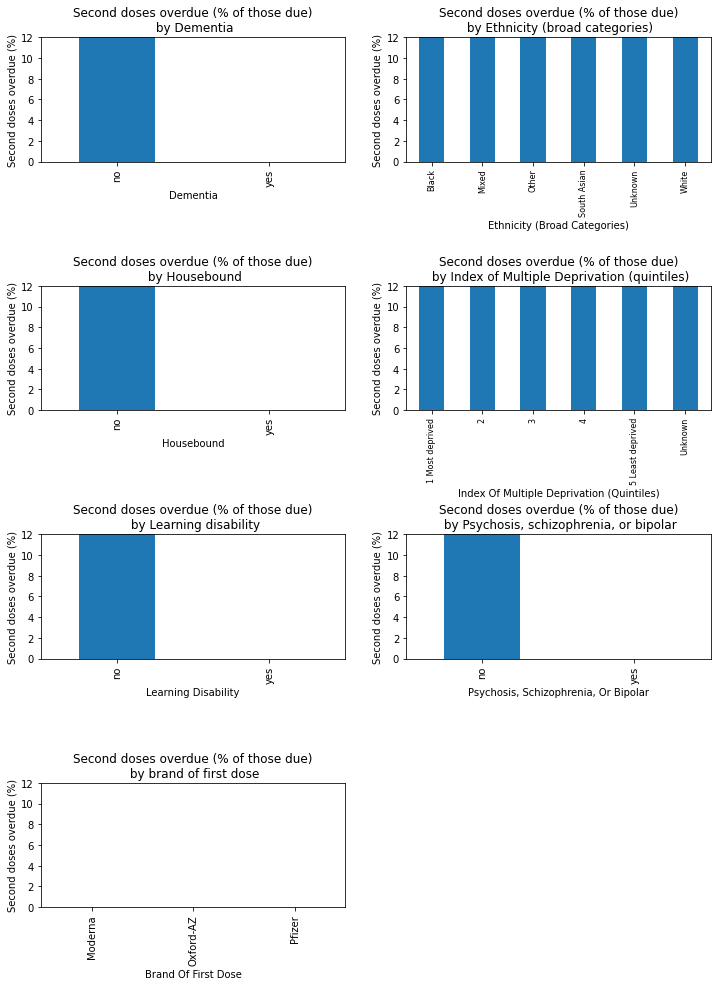

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative second dose vaccination figures among Learning Disabilities (aged 16-64) population 
 Please refer to footnotes below table for information.

Second Doses due at 17 Jan 2022 (n)  \
Category                     Group                                             
overall                      overall                                   1,106   
Sex                          F                                           567   
                             M                                           539   
Age band                     0                                             7   
                             0-15                                         70   
                             16-17                                        63   
                             18-29                                        70   
                             30-34                                        77   
                             35-39                                        91   
                             40-44                                        77   
                             45-49                                        77   
                             50-54                                        84   
                             55-59                                        70   
                             60-64                                        77   
                             65-69                                        63   
                             70-74                                        84   
                             75-79                                        63   
                             80-84                                        70   
                             85-89                                        63   
                             90+                                          14   
Ethnicity (broad categories) Black                                       203   
                             Mixed                                       182   
                             Other                                       210   
                             South Asian                                 189   
                             Unknown                                     154   
                             White                                       168   
brand of first dose          Pfizer                                        0   
                             Unknown                                   1,106   

                                         Second doses overdue (n)  \
Category                     Group                                  
overall                      overall                          238   
Sex                          F                                133   
                             M                                105   
Age band                     0                                  7   
                             0-15                              14   
                             16-17                             14   
                             18-29                             14   
                             30-34                             14   
                             35-39                             21   
                             40-44                             14   
                             45-49                             28   
                             50-54                             21   
                             55-59                             14   
                             60-64                             14   
                             65-69                              7   
                             70-74                             28   
                             75-79                             14   
                             80-84                             14   
                             85-89                             14   
                             90+                                0   
Ethnicity (broad categories) Black                             35   
                             Mixed                   

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Only persons who are currently registered and had their first dose at least 14 weeks ago are included in the 'due' group.

- Population excludes those who are shielding.

## 
 ## Second Doses Overdue Among People With Learning Disabilities (Aged 16-64)

Second doses which have not been given at least 14 weeks since the first dose

Error bars indicate possible error caused by rounding

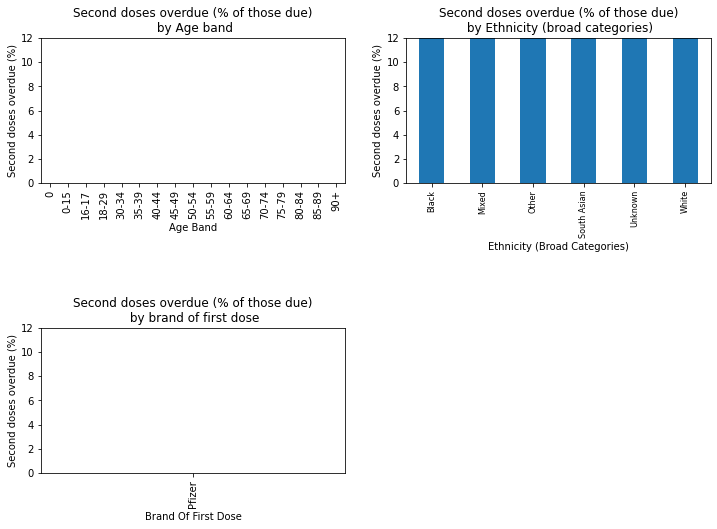

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative second dose vaccination figures among 60-64 population 
 Please refer to footnotes below table for information.

Second Doses due at 17 Jan 2022 (n)  \
Category                                  Group                                                                     
overall                                   overall                                                           3,612   
Sex                                       F                                                                 1,883   
                                          M                                                                 1,729   
Ethnicity (broad categories)              Black                                                               581   
                                          Mixed                                                               665   
                                          Other                                                               602   
                                          South Asian                                                         609   
                                          Unknown                                                             539   
                                          White                                                               609   
ethnicity 16 groups                        African                                                            210   
                                           Bangladeshi or British Bangladeshi                                 168   
                                           Caribbean                                                          203   
                                           Chinese                                                            196   
                                           Other                                                              196   
                                           Other Asian                                                        196   
                                          British or Mixed British                                            189   
                                          Indian or British Indian                                            189   
                                          Irish                                                               203   
                                          Other Black                                                         203   
                                          Other White                                                         175   
                                          Other mixed                                                         175   
                                          Pakistani or British Pakistani                                      175   
                                          Unknown                                                             581   
                                          White + Asian                                                       182   
                                          White + Black African                                               182   
                                          White + Black Caribbean                                             189   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                                     672   
                                          2                                                                   707   
                                          3                                                                   630   
                                          4                                                                   714   
                                          5 Least deprived                                                    707   
                                          Unknown                                                             182   
BMI                                       30+                                                       

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Only persons who are currently registered and had their first dose at least 14 weeks ago are included in the 'due' group.

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

- Chronic kidney disease is defined as the presence of a relevant diagnostic code, or a most recent stage recorded >= 3.

## 
 ## Second Doses Overdue Among 60-64 Population

Second doses which have not been given at least 14 weeks since the first dose

Error bars indicate possible error caused by rounding

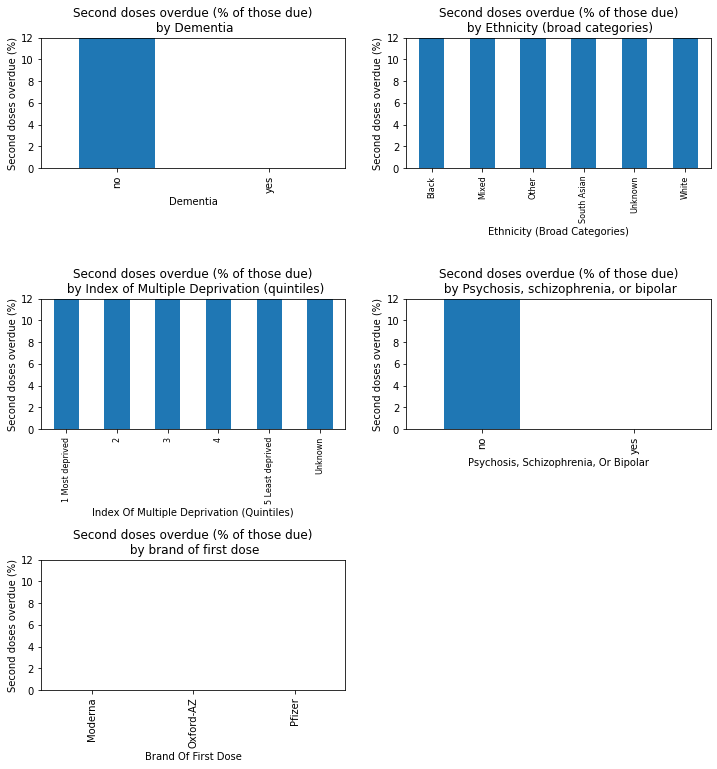

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative second dose vaccination figures among 55-59 population 
 Please refer to footnotes below table for information.

Second Doses due at 17 Jan 2022 (n)  \
Category                                  Group                                                                     
overall                                   overall                                                           4,284   
Sex                                       F                                                                 2,184   
                                          M                                                                 2,100   
Ethnicity (broad categories)              Black                                                               777   
                                          Mixed                                                               735   
                                          Other                                                               707   
                                          South Asian                                                         693   
                                          Unknown                                                             665   
                                          White                                                               693   
ethnicity 16 groups                        African                                                            217   
                                           Bangladeshi or British Bangladeshi                                 238   
                                           Caribbean                                                          224   
                                           Chinese                                                            224   
                                           Other                                                              231   
                                           Other Asian                                                        238   
                                          British or Mixed British                                            238   
                                          Indian or British Indian                                            217   
                                          Irish                                                               245   
                                          Other Black                                                         189   
                                          Other White                                                         203   
                                          Other mixed                                                         231   
                                          Pakistani or British Pakistani                                      238   
                                          Unknown                                                             651   
                                          White + Asian                                                       238   
                                          White + Black African                                               224   
                                          White + Black Caribbean                                             238   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                                     826   
                                          2                                                                   784   
                                          3                                                                   861   
                                          4                                                                   805   
                                          5 Least deprived                                                    805   
                                          Unknown                                                             196   
BMI                                       30+                                                       

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Only persons who are currently registered and had their first dose at least 14 weeks ago are included in the 'due' group.

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

- Chronic kidney disease is defined as the presence of a relevant diagnostic code, or a most recent stage recorded >= 3.

## 
 ## Second Doses Overdue Among 55-59 Population

Second doses which have not been given at least 14 weeks since the first dose

Error bars indicate possible error caused by rounding

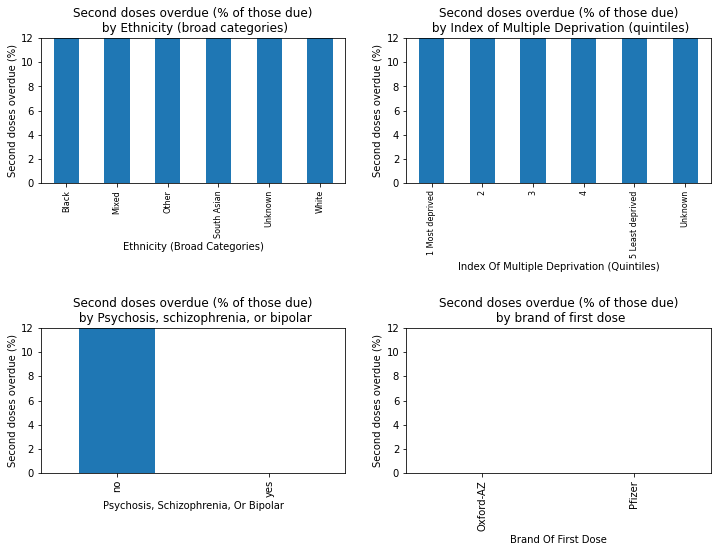

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative second dose vaccination figures among 50-54 population 
 Please refer to footnotes below table for information.

Second Doses due at 17 Jan 2022 (n)  \
Category                                  Group                                                                     
overall                                   overall                                                           4,557   
Sex                                       F                                                                 2,394   
                                          M                                                                 2,163   
Ethnicity (broad categories)              Black                                                               763   
                                          Mixed                                                               784   
                                          Other                                                               798   
                                          South Asian                                                         805   
                                          Unknown                                                             686   
                                          White                                                               728   
ethnicity 16 groups                        African                                                            245   
                                           Bangladeshi or British Bangladeshi                                 245   
                                           Caribbean                                                          231   
                                           Chinese                                                            245   
                                           Other                                                              231   
                                           Other Asian                                                        224   
                                          British or Mixed British                                            238   
                                          Indian or British Indian                                            266   
                                          Irish                                                               210   
                                          Other Black                                                         238   
                                          Other White                                                         238   
                                          Other mixed                                                         266   
                                          Pakistani or British Pakistani                                      252   
                                          Unknown                                                             672   
                                          White + Asian                                                       245   
                                          White + Black African                                               273   
                                          White + Black Caribbean                                             238   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                                     868   
                                          2                                                                   875   
                                          3                                                                   861   
                                          4                                                                   868   
                                          5 Least deprived                                                    868   
                                          Unknown                                                             224   
BMI                                       30+                                                       

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Only persons who are currently registered and had their first dose at least 14 weeks ago are included in the 'due' group.

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

- Chronic kidney disease is defined as the presence of a relevant diagnostic code, or a most recent stage recorded >= 3.

## 
 ## Second Doses Overdue Among 50-54 Population

Second doses which have not been given at least 14 weeks since the first dose

Error bars indicate possible error caused by rounding

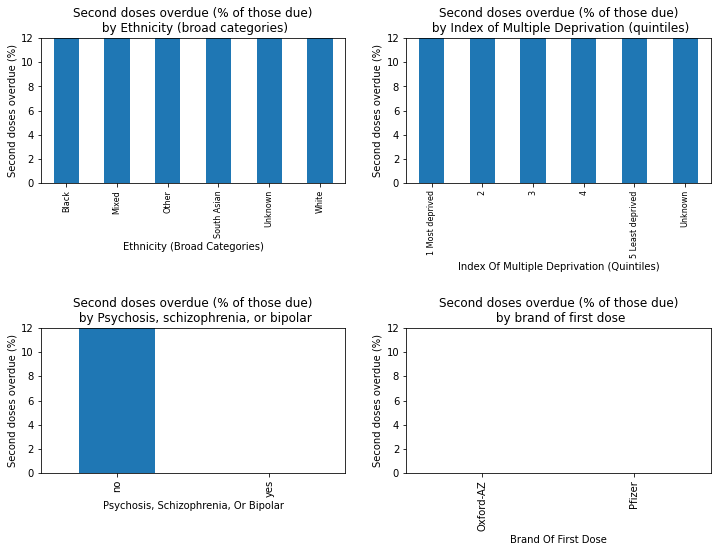

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative second dose vaccination figures among 40-49 population 
 Please refer to footnotes below table for information.

Second Doses due at 17 Jan 2022 (n)  \
Category                                  Group                                                                     
overall                                   overall                                                           8,505   
Sex                                       F                                                                 4,305   
                                          M                                                                 4,200   
Ethnicity (broad categories)              Black                                                             1,470   
                                          Mixed                                                             1,435   
                                          Other                                                             1,414   
                                          South Asian                                                       1,449   
                                          Unknown                                                           1,260   
                                          White                                                             1,477   
ethnicity 16 groups                        African                                                            427   
                                           Bangladeshi or British Bangladeshi                                 434   
                                           Caribbean                                                          441   
                                           Chinese                                                            441   
                                           Other                                                              448   
                                           Other Asian                                                        476   
                                          British or Mixed British                                            455   
                                          Indian or British Indian                                            469   
                                          Irish                                                               462   
                                          Other Black                                                         420   
                                          Other White                                                         441   
                                          Other mixed                                                         434   
                                          Pakistani or British Pakistani                                      448   
                                          Unknown                                                           1,316   
                                          White + Asian                                                       462   
                                          White + Black African                                               490   
                                          White + Black Caribbean                                             448   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                                   1,652   
                                          2                                                                 1,631   
                                          3                                                                 1,638   
                                          4                                                                 1,568   
                                          5 Least deprived                                                  1,610   
                                          Unknown                                                             413   
BMI                                       30+                                                       

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Only persons who are currently registered and had their first dose at least 14 weeks ago are included in the 'due' group.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

- Chronic kidney disease is defined as the presence of a relevant diagnostic code, or a most recent stage recorded >= 3.

## 
 ## Second Doses Overdue Among 40-49 Population

Second doses which have not been given at least 14 weeks since the first dose

Error bars indicate possible error caused by rounding

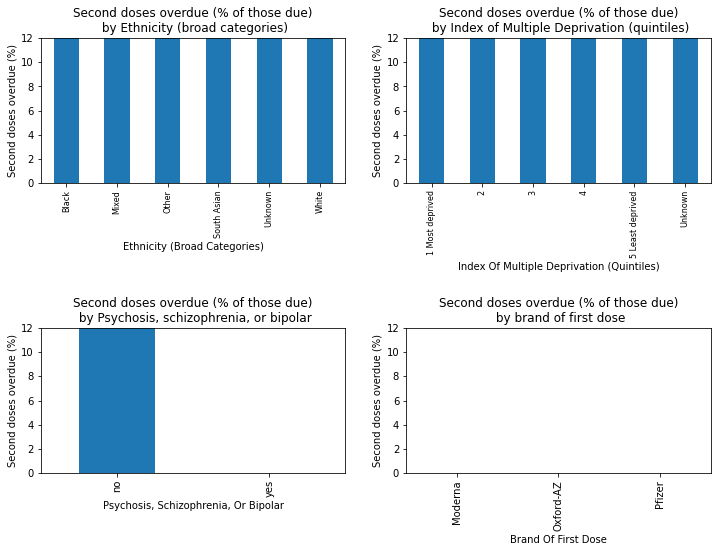

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative second dose vaccination figures among 30-39 population 
 Please refer to footnotes below table for information.

Second Doses due at 17 Jan 2022 (n)  \
Category                                  Group                                                                     
overall                                   overall                                                           8,911   
Sex                                       F                                                                 4,592   
                                          M                                                                 4,319   
Ethnicity (broad categories)              Black                                                             1,505   
                                          Mixed                                                             1,470   
                                          Other                                                             1,470   
                                          South Asian                                                       1,575   
                                          Unknown                                                           1,372   
                                          White                                                             1,512   
ethnicity 16 groups                        African                                                            455   
                                           Bangladeshi or British Bangladeshi                                 497   
                                           Caribbean                                                          462   
                                           Chinese                                                            448   
                                           Other                                                              469   
                                           Other Asian                                                        504   
                                          British or Mixed British                                            504   
                                          Indian or British Indian                                            483   
                                          Irish                                                               469   
                                          Other Black                                                         476   
                                          Other White                                                         448   
                                          Other mixed                                                         462   
                                          Pakistani or British Pakistani                                      483   
                                          Unknown                                                           1,372   
                                          White + Asian                                                       462   
                                          White + Black African                                               455   
                                          White + Black Caribbean                                             469   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                                   1,694   
                                          2                                                                 1,722   
                                          3                                                                 1,624   
                                          4                                                                 1,701   
                                          5 Least deprived                                                  1,750   
                                          Unknown                                                             420   
brand of first dose                       Oxford-AZ                                                 

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Only persons who are currently registered and had their first dose at least 14 weeks ago are included in the 'due' group.

## 
 ## Second Doses Overdue Among 30-39 Population

Second doses which have not been given at least 14 weeks since the first dose

Error bars indicate possible error caused by rounding

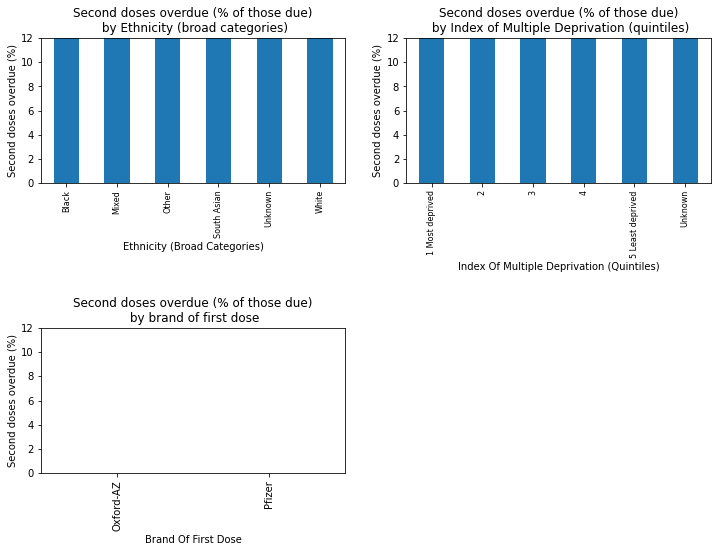

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative second dose vaccination figures among 18-29 population 
 Please refer to footnotes below table for information.

Second Doses due at 17 Jan 2022 (n)  \
Category                                  Group                                                                     
overall                                   overall                                                          10,248   
Sex                                       F                                                                 5,292   
                                          M                                                                 4,956   
Ethnicity (broad categories)              Black                                                             1,687   
                                          Mixed                                                             1,722   
                                          Other                                                             1,715   
                                          South Asian                                                       1,785   
                                          Unknown                                                           1,596   
                                          White                                                             1,736   
ethnicity 16 groups                        African                                                            525   
                                           Bangladeshi or British Bangladeshi                                 525   
                                           Caribbean                                                          560   
                                           Chinese                                                            553   
                                           Other                                                              546   
                                           Other Asian                                                        511   
                                          British or Mixed British                                            525   
                                          Indian or British Indian                                            581   
                                          Irish                                                               546   
                                          Other Black                                                         581   
                                          Other White                                                         532   
                                          Other mixed                                                         511   
                                          Pakistani or British Pakistani                                      560   
                                          Unknown                                                           1,484   
                                          White + Asian                                                       553   
                                          White + Black African                                               602   
                                          White + Black Caribbean                                             546   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                                   1,960   
                                          2                                                                 1,911   
                                          3                                                                 1,897   
                                          4                                                                 2,030   
                                          5 Least deprived                                                  1,932   
                                          Unknown                                                             525   
brand of first dose                       Moderna                                                   

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Only persons who are currently registered and had their first dose at least 14 weeks ago are included in the 'due' group.

## 
 ## Second Doses Overdue Among 18-29 Population

Second doses which have not been given at least 14 weeks since the first dose

Error bars indicate possible error caused by rounding

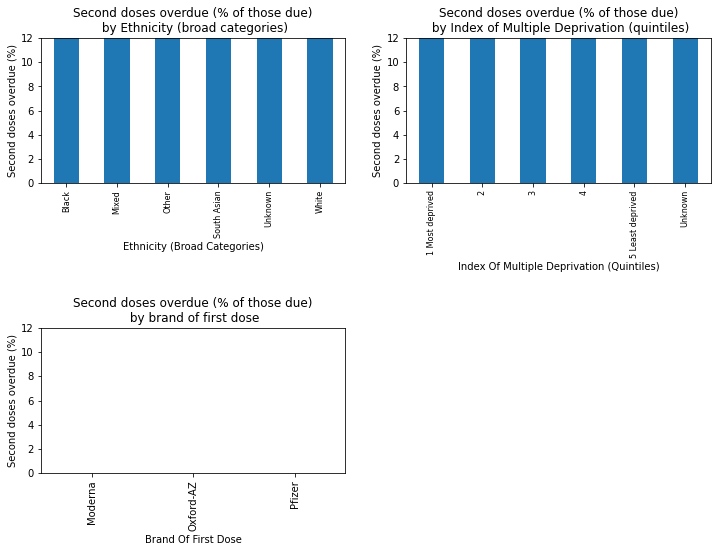

## 
 # Summary

,Second Doses due at 17 Jan 2022 (n),Second doses overdue (n),Second doses given (n),Second doses given (% of due),Total population
80+,"2,779",560,"2,219",79.8,"4,109"
70-79,"4,739",938,"3,801",80.2,"7,049"
care home,"1,876",371,"1,505",80.2,"2,779"
shielding (aged 16-69),588,119,469,79.8,868
65-69,"2,926",581,"2,345",80.1,"4,270"
LD (aged 16-64),"1,106",238,868,78.5,"1,631"
60-64,"3,612",735,"2,877",79.7,"5,271"
55-59,"4,284",847,"3,437",80.2,"6,251"
50-54,"4,557",945,"3,612",79.3,"6,755"
40-49,"8,505","1,680","6,825",80.2,"12,453"


In [3]:
tablelist = find_and_sort_filenames("tables", by_demographics_or_population="population", 
                                    pre_string="among ", tail_string=" population.csv",
                                    population_subset="Cumulative first dose 14w ago",
                                    files_to_exclude=["Cumulative first dose 14w ago vaccination figures among 16-17 population.csv"],
                                    )
    
# get 2nd dose figures for each group
tablelist_2nd = find_and_sort_filenames("tables", by_demographics_or_population="population", 
                                        pre_string="among ", tail_string=" population.csv",
                                        population_subset="Cumulative second dose vaccination",
                                        files_to_exclude=["Cumulative second dose vaccination figures among 16-17 population.csv"],
                                        )


second_third_doses(tablelist, tablelist_2nd, dose_type="Second", time_period="14 weeks",
                   latest_date_fmt=latest_date_fmt,
                   latest_date_fmt_2=latest_date_14w_fmt, 
                   backend=backend, suffix = "_tpp")
   